In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

2025-05-09 19:47:59.421633: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746800279.447065 2518598 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746800279.455427 2518598 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746800279.476152 2518598 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746800279.476179 2518598 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746800279.476182 2518598 computation_placer.cc:177] computation placer alr

In [2]:
import tensorflow as tf

print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print("Available GPUs:", tf.config.list_physical_devices('GPU'))

Num GPUs Available: 1
Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:


# Example operation
a = tf.constant([[1.0, 2.0], [3.0, 4.0]])
b = tf.constant([[1.0, 1.0], [0.0, 1.0]])
c = tf.matmul(a, b)
print(c)


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
input: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
_EagerConst: (_EagerConst): /job:localhost/replica:0/task:0/device:GPU:0
output_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
a: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
b: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
MatMul: (MatMul): /job:localhost/replica:0/task:0/device:GPU:0
product_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[1. 3.]
 [3. 7.]], shape=(2, 2), dtype=float32)


I0000 00:00:1746787946.385076 2448336 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 16163 MB memory:  -> device: 0, name: Tesla V100-PCIE-32GB, pci bus id: 0000:3b:00.0, compute capability: 7.0
2025-05-09 16:22:26.452758: I tensorflow/core/common_runtime/placer.cc:162] input: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
2025-05-09 16:22:26.452843: I tensorflow/core/common_runtime/placer.cc:162] _EagerConst: (_EagerConst): /job:localhost/replica:0/task:0/device:GPU:0
2025-05-09 16:22:26.452853: I tensorflow/core/common_runtime/placer.cc:162] output_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:GPU:0
2025-05-09 16:22:26.857851: I tensorflow/core/common_runtime/placer.cc:162] a: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
2025-05-09 16:22:26.857896: I tensorflow/core/common_runtime/placer.cc:162] b: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
2025-05-09 16:22:26.857911: I tensorflow/core/common_runtime/placer.cc:

In [3]:
train_dir = "/home/ec.gpu/Desktop/Soumen/Dataset/Hydrophobicity_photos/train"
val_dir = "/home/ec.gpu/Desktop/Soumen/Dataset/Hydrophobicity_photos/validation"
test_dir = "/home/ec.gpu/Desktop/Soumen/Dataset/Hydrophobicity_photos/test"

In [3]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)


Found 2800 files belonging to 7 classes.


I0000 00:00:1746788716.583743 2453333 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 16163 MB memory:  -> device: 0, name: Tesla V100-PCIE-32GB, pci bus id: 0000:3b:00.0, compute capability: 7.0


Found 700 files belonging to 7 classes.
Found 1036 files belonging to 7 classes.


In [11]:
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(224, 224, 3)),
    
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(7, activation='softmax')  # 7 classes
])


In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [13]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10


2025-05-09 16:47:34.743439: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=0} for conv %cudnn-conv-bias-activation.9 = (f32[32,32,222,222]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,224,224]{3,2,1,0} %bitcast.4935, f32[32,3,3,3]{3,2,1,0} %bitcast.4714, f32[32]{0} %bitcast.5278), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_1_1/conv2d_1/convolution" source_file="/home/ec.gpu/miniconda3/envs/tf_gpu_env/lib/python3.10/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-05-09 16:47:34.842443: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omi

86/88 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2766 - loss: 2.1081

2025-05-09 16:47:41.000248: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=0} for conv %cudnn-conv-bias-activation.9 = (f32[16,32,222,222]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,3,224,224]{3,2,1,0} %bitcast.4935, f32[32,3,3,3]{3,2,1,0} %bitcast.4714, f32[32]{0} %bitcast.5278), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_1_1/conv2d_1/convolution" source_file="/home/ec.gpu/miniconda3/envs/tf_gpu_env/lib/python3.10/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-05-09 16:47:41.061097: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omi

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.2802 - loss: 2.0940

2025-05-09 16:47:45.603990: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=0} for conv %cudnn-conv-bias-activation.9 = (f32[32,32,222,222]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,224,224]{3,2,1,0} %bitcast.535, f32[32,3,3,3]{3,2,1,0} %bitcast.542, f32[32]{0} %bitcast.544), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_1_1/conv2d_1/convolution" source_file="/home/ec.gpu/miniconda3/envs/tf_gpu_env/lib/python3.10/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-05-09 16:47:45.687763: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitte

88/88 ━━━━━━━━━━━━━━━━━━━━ 15s 108ms/step - accuracy: 0.2819 - loss: 2.0872 - val_accuracy: 0.6986 - val_loss: 0.7458
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6926 - loss: 0.7795 - val_accuracy: 0.8743 - val_loss: 0.3703
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.8018 - loss: 0.5332 - val_accuracy: 0.8957 - val_loss: 0.3149
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.8617 - loss: 0.3909 - val_accuracy: 0.8857 - val_loss: 0.3393
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.8818 - loss: 0.3526 - val_accuracy: 0.9343 - val_loss: 0.2215
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9048 - loss: 0.2765 - val_accuracy: 0.9386 - val_loss: 0.1917
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9352 - loss: 0.1682 - val_accuracy: 0.9457 - val_loss: 0.1952
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9470 - loss: 0.1547 - val_accuracy: 0.8671 - val_loss: 

In [14]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.2f}")


 1/33 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9688 - loss: 0.1314

26/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9190 - loss: 0.2930

2025-05-09 16:48:18.092005: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=0} for conv %cudnn-conv-bias-activation.9 = (f32[12,32,222,222]{3,2,1,0}, u8[0]{0}) custom-call(f32[12,3,224,224]{3,2,1,0} %bitcast.535, f32[32,3,3,3]{3,2,1,0} %bitcast.542, f32[32]{0} %bitcast.544), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_1_1/conv2d_1/convolution" source_file="/home/ec.gpu/miniconda3/envs/tf_gpu_env/lib/python3.10/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-05-09 16:48:18.144118: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitte

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9169 - loss: 0.2947
Test Accuracy: 0.91


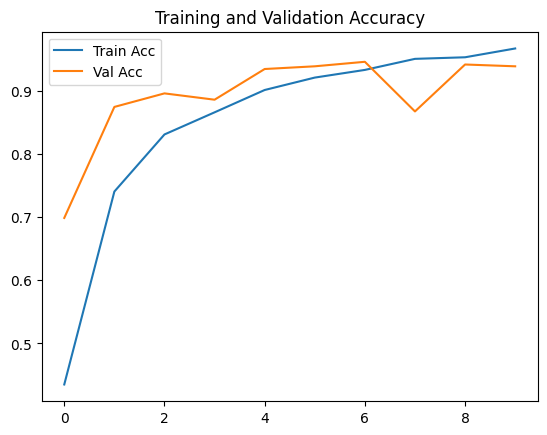

In [15]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,739,415 (254.59 MB)

 Trainable params: 22,246,471 (84.86 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 44,492,944 (169.73 MB)

In [4]:
base_model = tf.keras.applications.ResNet50(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False  # Freeze base model


In [5]:
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(224, 224, 3)),  # Normalize pixel values
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(7, activation='softmax')  # 7 classes
])


/home/ec.gpu/miniconda3/envs/tf_gpu_env/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


Epoch 1/10


I0000 00:00:1746788828.200350 2453548 service.cc:152] XLA service 0x7f3af804c8f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746788828.200425 2453548 service.cc:160]   StreamExecutor device (0): Tesla V100-PCIE-32GB, Compute Capability 7.0
2025-05-09 16:37:08.549549: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1746788831.262778 2453548 cuda_dnn.cc:529] Loaded cuDNN version 90400
2025-05-09 16:37:12.492845: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=0} for conv %cudnn-conv-bias-activation.162 = (f32[32,64,56,56]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,64,56,56]{3,2,1,0} %bitcast.7607, f32[64,64,3,3]{3,2,1,0} %bitcast.7614, f32[64]{0} %bitcast.7616), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__

 2/88 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.1250 - loss: 2.5257  

I0000 00:00:1746788836.237470 2453548 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.1471 - loss: 2.1442

2025-05-09 16:37:22.983114: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=0} for conv %cudnn-conv-bias-activation.162 = (f32[16,64,56,56]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,64,56,56]{3,2,1,0} %bitcast.7607, f32[64,64,3,3]{3,2,1,0} %bitcast.7614, f32[64]{0} %bitcast.7616), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_1/resnet50_1/conv2_block1_2_conv_1/convolution" source_file="/home/ec.gpu/miniconda3/envs/tf_gpu_env/lib/python3.10/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-05-09 16:37:23.163654: I external/local_xla/xla/service/gpu/autotuning

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.1473 - loss: 2.1428

2025-05-09 16:37:35.967698: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=0} for conv %cudnn-conv-bias-activation.162 = (f32[28,64,56,56]{3,2,1,0}, u8[0]{0}) custom-call(f32[28,64,56,56]{3,2,1,0} %bitcast.4839, f32[64,64,3,3]{3,2,1,0} %bitcast.4846, f32[64]{0} %bitcast.4848), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_1/resnet50_1/conv2_block1_2_conv_1/convolution" source_file="/home/ec.gpu/miniconda3/envs/tf_gpu_env/lib/python3.10/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-05-09 16:37:36.203122: I external/local_xla/xla/service/gpu/autotuning

88/88 ━━━━━━━━━━━━━━━━━━━━ 38s 259ms/step - accuracy: 0.1474 - loss: 2.1413 - val_accuracy: 0.1929 - val_loss: 1.9343
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - accuracy: 0.1753 - loss: 1.9366 - val_accuracy: 0.3143 - val_loss: 1.9208
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.1877 - loss: 1.9186 - val_accuracy: 0.2514 - val_loss: 1.8969
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.2179 - loss: 1.8902 - val_accuracy: 0.2529 - val_loss: 1.8636
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.2276 - loss: 1.8515 - val_accuracy: 0.2586 - val_loss: 1.8197
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.2515 - loss: 1.8084 - val_accuracy: 0.2600 - val_loss: 1.7723
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.2547 - loss: 1.7663 - val_accuracy: 0.3157 - val_loss: 1.7375
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.2555 - loss: 1.7470 - val_accuracy: 0.3229 - val_loss:

In [9]:
base_model.trainable = True

# Fine-tune from this layer onward
fine_tune_at = 140

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train again
model.fit(train_ds, validation_data=val_ds, epochs=20)


Epoch 1/20


88/88 ━━━━━━━━━━━━━━━━━━━━ 59s 357ms/step - accuracy: 0.6774 - loss: 0.9072 - val_accuracy: 0.6643 - val_loss: 0.8811
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.7488 - loss: 0.7574 - val_accuracy: 0.7900 - val_loss: 0.6352
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.7623 - loss: 0.6887 - val_accuracy: 0.8329 - val_loss: 0.4898
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.7982 - loss: 0.5725 - val_accuracy: 0.8486 - val_loss: 0.4603
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - accuracy: 0.8288 - loss: 0.4996 - val_accuracy: 0.8429 - val_loss: 0.4539
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - accuracy: 0.8494 - loss: 0.4597 - val_accuracy: 0.8800 - val_loss: 0.3897
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.8650 - loss: 0.4064 - val_accuracy: 0.9071 - val_loss: 0.3115
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.8877 - loss: 0.3483 - val_accuracy: 0.8914 - val_loss:

In [10]:
trainable_count = tf.reduce_sum([tf.size(w) for w in model.trainable_weights])
non_trainable_count = tf.reduce_sum([tf.size(w) for w in model.non_trainable_weights])
total_params = trainable_count + non_trainable_count

size_bytes = total_params.numpy() * 4  # 4 bytes per float32
size_mb = size_bytes / (1024 * 1024)
print(f"Estimated model size: {size_mb:.2f} MB")

Estimated model size: 91.99 MB


AttributeError: Line2D.set() got an unexpected keyword argument 'labelsize'

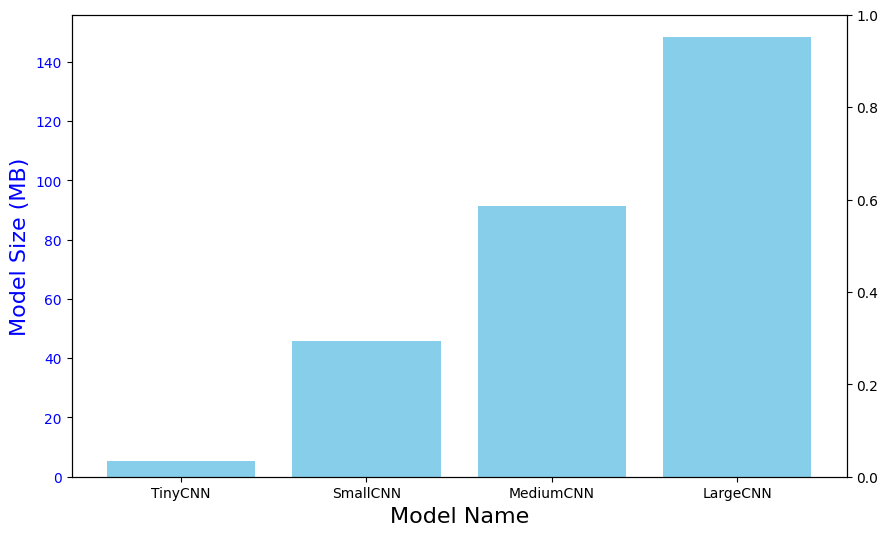

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models
import pandas as pd
import matplotlib.pyplot as plt

# Create output directory
os.makedirs("saved_models", exist_ok=True)

# Define a few custom CNNs of increasing complexity
def tiny_cnn():
    model = models.Sequential([
        layers.Input(shape=(224, 224, 3)),
        layers.Conv2D(16, 3, activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(7, activation='softmax')
    ])
    return model

def small_cnn():
    model = models.Sequential([
        layers.Input(shape=(224, 224, 3)),
        layers.Conv2D(32, 3, activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(7, activation='softmax')
    ])
    return model

def medium_cnn():
    model = models.Sequential([
        layers.Input(shape=(224, 224, 3)),
        layers.Conv2D(32, 3, activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, activation='relu'),
        layers.MaxPooling2D(),
        #layers.Conv2D(128, 3, activation='relu'),
        #layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(7, activation='softmax')
    ])
    return model

def large_cnn():
    model = models.Sequential([
        layers.Input(shape=(224, 224, 3)),
        layers.Conv2D(64, 3, activation='relu'),
        layers.Conv2D(64, 3, activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(128, 3, activation='relu'),
        layers.Conv2D(128, 3, activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(256, 3, activation='relu'),
        layers.Conv2D(256, 3, activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(7, activation='softmax')
    ])
    return model

# List of (model function, name, simulated test accuracy)
model_list = [
    (tiny_cnn, "TinyCNN", 0.70),
    (small_cnn, "SmallCNN", 0.75),
    (medium_cnn, "MediumCNN", 0.80),
    (large_cnn, "LargeCNN", 0.86)
]

results = []

# Function to save model and compute size
def get_model_size_mb(model, name):
    path = f"saved_models/{name}.h5"
    model.save(path)
    size_mb = os.path.getsize(path) / (1024 * 1024)
    return size_mb

# Evaluate and log results
for model_fn, name, acc in model_list:
    model = model_fn()
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    size_mb = get_model_size_mb(model, name)
    results.append({"Model": name, "Size_MB": size_mb, "Test_Accuracy": acc})

# Save results to CSV
df = pd.DataFrame(results)
df.to_csv("model_comparison_log.csv", index=False)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(df['Model'], df['Size_MB'], color='skyblue')
ax1.set_ylabel('Model Size (MB)', color='blue',fontsize=16)
ax1.set_xlabel('Model Name',fontsize=16)
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(df['Model'], df['Test_Accuracy'], color='green', marker='o', linewidth=2)
ax2.set_ylabel('Test Accuracy', color='green',fontsize=16)
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Custom CNN Models: Size vs. Accuracy',fontsize=16)
plt.tight_layout()
plt.show()


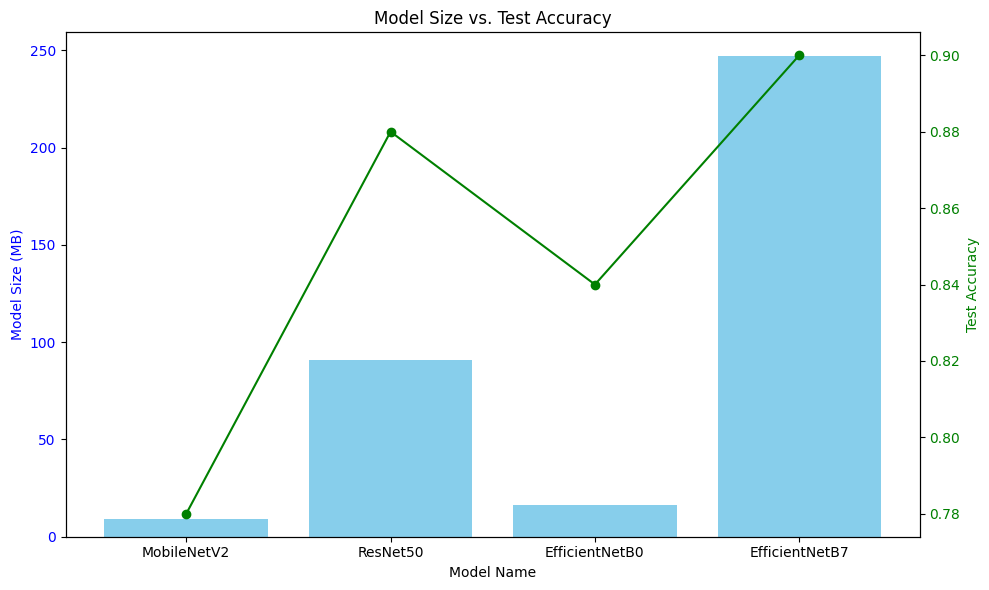

In [19]:
import os
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# Dictionary to hold model evaluation results
model_results = []

# Function to evaluate model size
def get_model_size(model, model_name):
    model.save(f"{model_name}.h5")
    size_mb = os.path.getsize(f"{model_name}.h5") / (1024 * 1024)
    return size_mb

# Dummy model evaluation loop (replace with your trained models and test accuracy)
# Format: (model_instance, model_name, test_accuracy)
model_list = [
    (tf.keras.applications.MobileNetV2(weights=None, input_shape=(224, 224, 3), classes=7), "MobileNetV2", 0.78),
    (tf.keras.applications.ResNet50(weights=None, input_shape=(224, 224, 3), classes=7), "ResNet50", 0.88),
    (tf.keras.applications.EfficientNetB0(weights=None, input_shape=(224, 224, 3), classes=7), "EfficientNetB0", 0.84),
    (tf.keras.applications.EfficientNetB7(weights=None, input_shape=(224, 224, 3), classes=7), "EfficientNetB7", 0.90),
]

for model, name, acc in model_list:
    size = get_model_size(model, name)
    model_results.append({"Model": name, "Size_MB": size, "Test_Accuracy": acc})
    os.remove(f"{name}.h5")  # cleanup

# Save to CSV
df = pd.DataFrame(model_results)
df.to_csv("model_comparison_log.csv", index=False)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(df['Model'], df['Size_MB'], color='skyblue', label='Model Size (MB)')
ax1.set_ylabel('Model Size (MB)', color='blue')
ax1.set_xlabel('Model Name')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(df['Model'], df['Test_Accuracy'], color='green', marker='o', label='Test Accuracy')
ax2.set_ylabel('Test Accuracy', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Model Size vs. Test Accuracy')
plt.tight_layout()
plt.show()
